Please fill in your name and that of your teammate.

You: **Ahonon Gobi Parfait**

Teammate: **Werner Schmid**

# Introduction

Welcome to the first lab. Take a moment to familiarize yourself with this interactive notebook. Each notebook is composed of cells. Each cell can be [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) _(easy-to-format text)_ or **code** (Python 3). Markdown cells also accept $\LaTeX$ formatting. Feel free to double-click on these textual cells (switching to edit mode) to see how they were made.

When a cell is highlighted, it has two modes: command and input. Press `esc` to go to *command mode*, press `enter` to go into *edit/input mode*. There are a few shortcuts that only work in edit mode that can make your life easier. This will probably satiate your curiosity: [[link]](https://towardsdatascience.com/optimizing-jupyter-notebook-tips-tricks-and-nbextensions-26d75d502663).

A few shortcuts that will make your life easier: you can always press `shift+enter` to evaluate the current cell; in *command mode*, press `a` to create a new cell above the current, `b` to create one below, `m` to convert to markdown, `y` to convert to code. Cells can be also merged and split (did you check the shortcuts?).

And if you look for a command for which you don't know the shortcut yet, press `p` for the command palette and try typing what you are looking for in the search field.

### (Computational) kernel

Jupyter as a server generates the interactive web interface that you are seeing (and using) now. To run the code, the server maintains a running instance of Python, what is called a _computational kernel_. Think of it as an open terminal window with the interactive Python open: each time you _evaluate_ a cell, the code is run on that "kernel", and the output is displayed below the input cell. Try to run the cell below:

In [1]:
a = 3+2
print(a)

5


Then you can use the variable `a` again in your next executions:

In [2]:
print(a)

5


Just remember that the order in which you run the cells matters: for example try running next the cell below this text, and then the cell above this text once more.

In [3]:
a = 3-2

Check the `Kernel` menu on top of the page for options on controlling the underlying Python execution. For example, `Restart & Run All` terminates the current kernel, launches a new fresh one, then executes all (code) cells in the notebook in order. The `Interrupt` command is also useful if a bug gets the execution stuck.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pts]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Overcomplete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 16 points (out of 24 available) to pass** (66%).

# 1. Fundamentals

Let's start simple. 

#### 1.1 **[1pt]** Write a sentence that correctly employs the words *problem*, *solution*, *model* and *parameters set*.

R: In order to address the **classification problem** of identifying **spam emails**, we propose a **logistic regression model** as the **solution**, where the **parameters set** consists of the weights assigned to each feature in the email dataset.


#### 1.2 **[1pt]** Write the equation of a linear model. You should use $\LaTeX$ formatting, just wrap the equation in between dollar signs (e.g. `$\LaTeX$`).

R: $y = mx + q$

#### 1.3 **[1pt]** When is a system of equations *overdetermined*?

R: When there are more data points than unknown parameters the system is overdetermined.

Example: \[
\begin{cases}
2x + 3y = 10 \\
3x + 4y = 15 \\
4x + 5y = 20 \\
\end{cases}
\]


#### 1.4 **[1pt]** Describe with your own words (i.e. English) what is a *Training Dataset*.
Mind, there is not an explicit definition in the slides, you should understand the math (your lecture notes may help).

R: A **training dataset** is a set of data points used to train a machine learning **model**. It consists of input-output pairs, where the **inputs** are the features or attributes of the data, and the **outputs** are the corresponding labels or target values. The training dataset serves as the foundation for the model to learn patterns and relationships between the **inputs** and **outputs**. By iteratively adjusting the **model's parameters** based on the training dataset, the model strives to minimize its prediction error and generalize well to unseen data. In essence, the training dataset provides the examples and ground truth information needed for the model to learn and improve its performance.


#### 1.5 **[1pt]** List the other two (main) learning paradigms beside *unsupervised learning*.

1. **Supervised Learning**: In supervised learning, the algorithm learns from a labeled dataset, where each example is paired with a corresponding target or label. The algorithm aims to learn a mapping from inputs to outputs based on the labeled examples provided in the training dataset. Common tasks in supervised learning include classification and regression.

2. **Reinforcement Learning**: In reinforcement learning, an agent learns to make decisions by interacting with an environment. The agent receives feedback in the form of rewards or penalties based on its actions, and the goal is to learn a policy that maximizes the cumulative reward over time. Reinforcement learning is often used in sequential decision-making tasks, such as game playing, robotics, and autonomous driving.


#### 1.6 **[1pt]** Which word describes when the model I use is too complex to capture the underlying simplicity of the data? 
Careful not to pick the wrong term.

R: Overfitting

# 2. Error, loss and risk

Understanding the concept of loss and risk is fundamental to comprehending the general idea of an "error". The whole ML is founded on the basis of recognizing error and minimizing it. These questions go into a separate section to highlight how important it is that you understand what is going on here.

#### 2.1 **[3pt]** About the *Loss Function*: why $L(\hat y, y) = 0 \;\;\text{if}\;\; \hat y = y, \;\;\forall y \in Y$?

R: The loss function measures the discrepancy between the predicted value $\hat y$ and the true value $y$. When the **predicted value** is equal to the true value, the loss function evaluates to zero. **This is because the model's prediction is perfectly aligned with the ground truth, and there is no error to penalize**. In other words, the model has made the **correct prediction**, and the **loss function** reflects this by assigning a zero loss. The loss function is designed to quantify the model's prediction error, and a zero loss indicates that the model has made no error in its prediction.

If you want to implement the *Empirical Risk* in Python, you need to understand its mathematical form. Let's say that the *Loss* is a simple difference between prediction and target:

#### 2.2 **[3pt]** What does $\hat{R}(h) = \sum_{i=1}^n L(h(x_i), y_i),\;\forall (x_i, y_i) \in D$ mean?
In English here, though you will get to code it in one of the next questions.

The expression $\hat{R}(h) = \sum_{i=1}^n L(h(x_i), y_i),\;\forall (x_i, y_i) \in D$ represents the **empirical risk**, denoted as $\hat{R}(h)$, of a hypothesis function $h$ computed over a dataset $D$. it means:

- $h$ is the hypothesis function or model under consideration.
- $D$ is the dataset consisting of input-output pairs $(x_i, y_i)$ where $x_i$ represents the input features and $y_i$ represents the corresponding output or target value.
- $L$ is the loss function, which measures the discrepancy between the predicted output $h(x_i)$ and the actual output $y_i$.
- The sum $\sum_{i=1}^n$ is taken over all data points in the dataset $D$.
- For each data point $(x_i, y_i)$ in $D$, the loss $L(h(x_i), y_i)$ is computed by evaluating the hypothesis function $h$ on the input $x_i$ and comparing the predicted output $h(x_i)$ to the true output $y_i$.
- The empirical risk $\hat{R}(h)$ is then calculated as the sum of the losses over all data points in the dataset $D$, providing a measure of how well the hypothesis function $h$ fits the data.

Then, this expression quantifies the average loss of the hypothesis function $h$ on the dataset $D$, which serves as a measure of how well the hypothesis function performs on the given data. :)


# 3. Simplest learning

Enough concepts, let's have some fun. I hope you are familiar with Python -- if not yet, you should become so by the end of the course. If your confidence is low you should start a discussion on Moodle, so that you can all help each other (and help us help you).

Do you know about `lambda` functions in Python? You can write a method that returns a function. The function can be used as if it was a method defined with `def`. Only be careful about 1. `lambda`s always (implicitly) `return` the result of their computation, and 2. you cannot write multiline lambdas (go ask Guido van Rossum why). Still, using them is easier than it sounds:

In [4]:
def add_n(n): return lambda x: n+x
add_3 = add_n(3)
add_3(5)

8

Ok how about we create and plot some artificial data? Study the code below, if there is any feature you are not yet familiar with you should make sure to learn it (ask on Moodle).

I mean it. Later on you will be required to use all of these functionalities yourself. Verify early in the course what you need to refresh and what is entirely new, because later on studying software engineering while working on the (much!) harder assignments may become a problem.

In [5]:
# These lines are required for our plotting function below
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# While this is the library for numerical manipulations
import numpy as np

# This is just some styling for the plotting library
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

# Let's create the data from a function you should be acquainted with by now
# (do you know lambdas yet? They are basically short, unnamed methods)
trg_fn = lambda x: 2*x - 1 
# Of course we want the data to be a bit noisy
some_noise = lambda: np.random.normal(0,3)
# Let's generate it using numpy's linear space and a python list comprehension,
# just to make sure you know these too
data = [[x, trg_fn(x) + some_noise()] for x in np.linspace(-10, 10, 50)]

# You will find commonly data treated by axis/column rather than coordinate pairs.
# This aggregates data series belonging to the same dimension (feature)
transpose = lambda lst: list(map(list, zip(*lst)))
data_x, data_y = transpose(data)

# And here's a canned plotting function that you are free to use (for now...)
def plot_data_and_model(model=None, text=None):
    ret = sns.scatterplot(x=data_x, y=data_y) # hard-coded data plotting because we can
    if model is not None:
        sns.lineplot(x=data_x, y=[model(x) for x in data_x], color='darkred')
    if text is not None:
        plt.title(text)
    return ret

Here is what the data you just generated looks like:

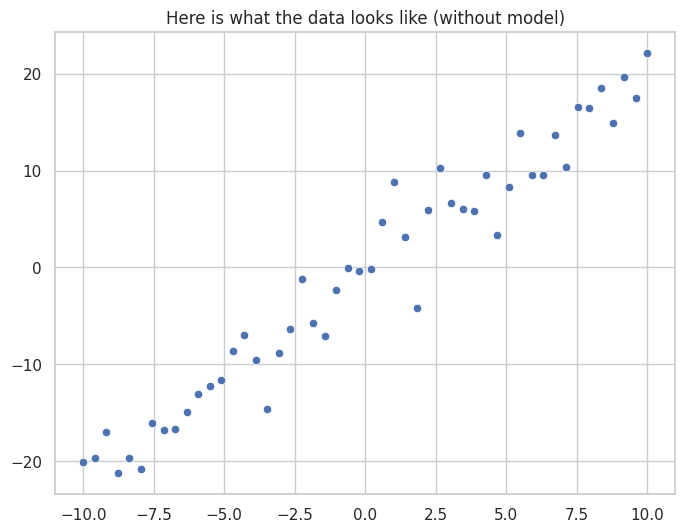

In [6]:
plot_data_and_model(text="Here is what the data looks like (without model)");

And here is what it looks like if you cheat and plot the underlying function (ideally your final, learned model should look similar)

<Axes: title={'center': 'Data with generating function'}>

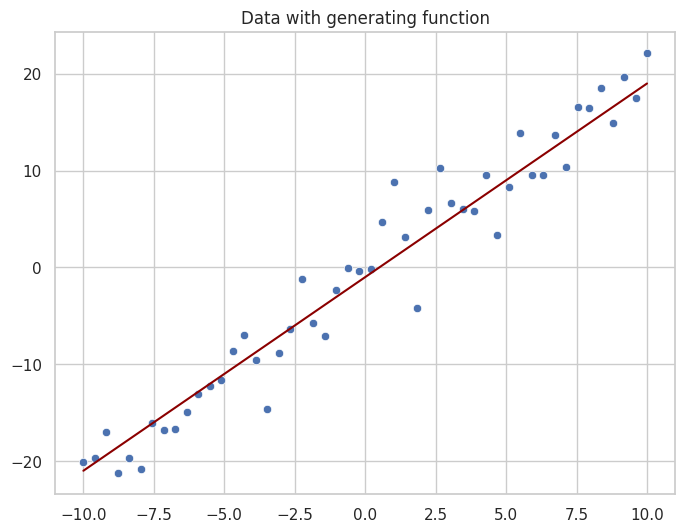

In [7]:
plot_data_and_model(trg_fn, text="Data with generating function")

#### 3.1 **[2pt]** Write your linear model as a method that takes `m` and `q` as input, and return a linear function of the form `mx + q`.

In [8]:
def linear_model(m,q):
    return lambda x: m*x + q

#### 3.2 **[2pt]** Write your loss as a method that takes an `x` and a target and returns the absolute value of their difference
(think: what happens if we forget the absolute value?)

In [9]:
def loss(x, y):
    return abs(x-y)

What happens if we forget the absolute value? The loss function would not penalize the model for making incorrect predictions, and the model would not learn to minimize its prediction error. This would lead to a poor model that does not accurately capture the underlying patterns in the data. By including the absolute value, the loss function ensures that the model is penalized for its prediction errors, and the model learns to minimize its prediction error over time.

#### 3.3 **[2pt]** Write your risk as a method (or lambda) that takes a model as input, and returns the total loss over our (hard-coded) data

In [10]:
risk = lambda model: sum(loss(model(x), y) for x, y in data)

Here is an example of a loop that generates random numbers and maintains a *minimum*.  
(think: will you need to minimize or maximize the risk of your model?)

You will need to minimize the risk of your model. The goal is to find the model's parameters that minimize the risk, which corresponds to finding the model that best fits the data. By minimizing the risk, the model aims to make accurate predictions and generalize well to unseen data.

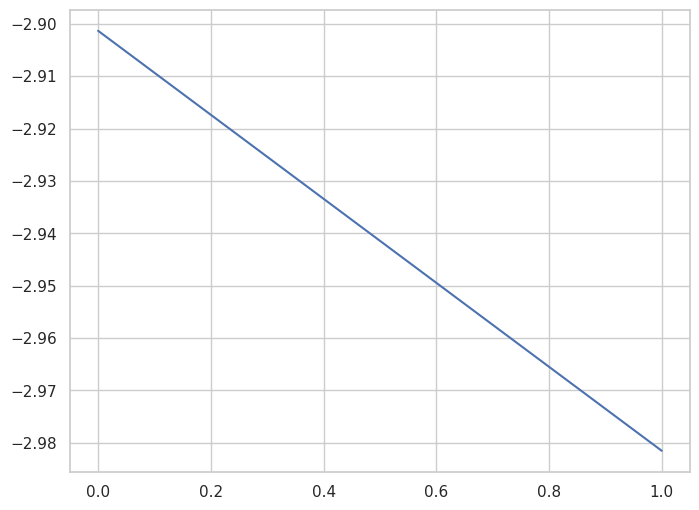

In [11]:
min_guess = np.Infinity # higher than highest possible

best_guesses = []
for _ in range(100):
    guess = np.random.uniform(-3,3)
    if guess < min_guess:
        min_guess = guess
        best_guesses.append(min_guess)

sns.lineplot(x=range(len(best_guesses)), y=best_guesses);

TIP: it is always useful to visualize how the loss decreases over time, especially for debugging purposes. You can do the same next for your errors/losses.

#### 3.4 **[6pt]** Randomly guess a model's parameters 1000 times. Then plot it using the call below.
```python
plot_data_and_model(lin_model(m, q), text=f"m={round(m,2)}    q={round(q,2)}")        
```
Make sure you understand how string interpolation works when using the format `f"hello w{2+1-3}rld"`.  
You will need to modify the loop above in order to maintain both a best guess for your model and its corresponding best risk/error.

<Axes: title={'center': 'm=1.74    q=-0.4'}>

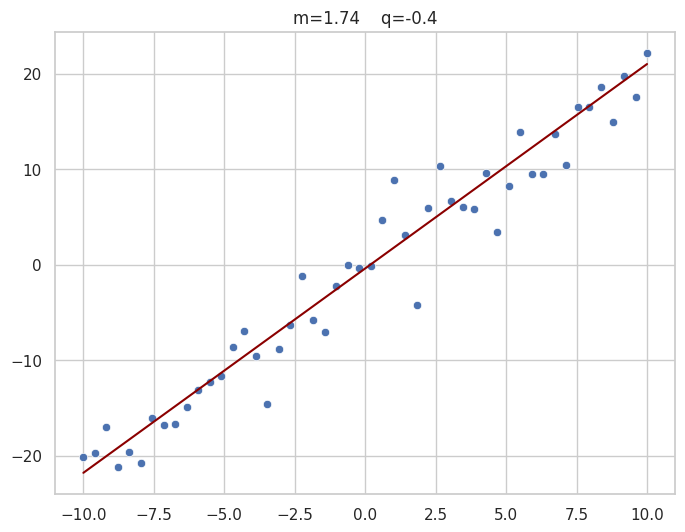

In [12]:
min_risk = np.Infinity
best_model = None

for _ in range(1000):
    m_guess, q_guess = np.random.uniform(-3, 3), np.random.uniform(-3, 3)
    model = linear_model(m_guess, q_guess)
    current_risk = risk(model)

    if current_risk < min_risk:
        min_risk = current_risk
        best_model = model

plot_data_and_model(best_model, text=f"m={round(best_model(1),2)}    q={round(best_model(0),2)}")


# End :)